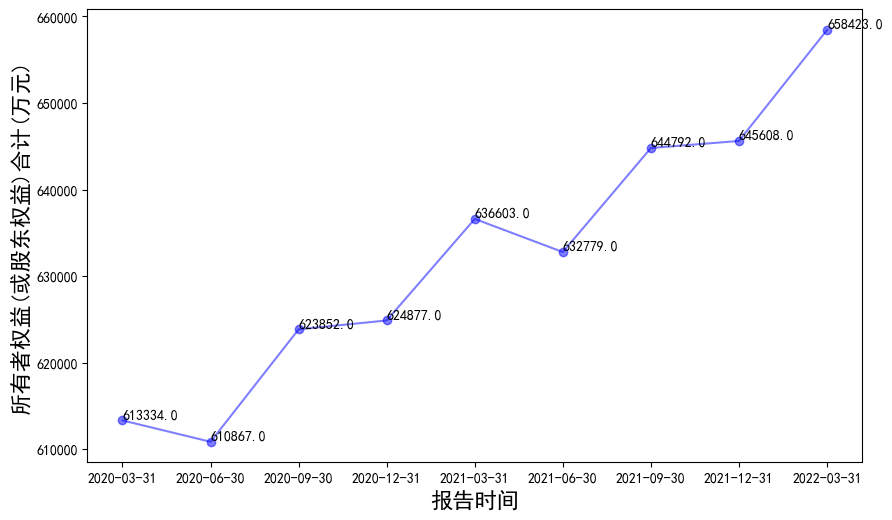

In [1]:
# 网易数据
# 导入库
import pandas as pd
import matplotlib.pyplot as plt

# 获取数据
ts_data = pd.read_csv('cwbbzy600125.csv',encoding='gbk')

# 将数据转换为DataFrame数据
df1 = pd.DataFrame(ts_data)

df1.duplicated().sum()
df1.isna().sum()

# 重复数据处理
df1 = df1.drop_duplicates()
# 空值处理
df1 = df1.dropna(axis=0, how='all')

# 获取最近10期报告数据
df1 = df1.iloc[:, 0:10]

# 设置行名
df1.index = df1['报告期']
df1 = df1.drop(['报告期'], axis=1)

#设置X轴,Y轴数据
x=[x for x in df1.columns][::-1]
y=[float(y) for y in df1.loc['所有者权益(或股东权益)合计(万元)']][::-1]

# 解决汉字显示乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置画布大小
plt.subplots(1, 1, figsize=(10, 6), dpi=100)

# 折线图
plt.plot(x, y, color='blue', marker='o', linestyle='-', alpha=0.5)

# 添加标签
plt.xlabel('报告时间', fontsize='16')
plt.ylabel('所有者权益(或股东权益)合计(万元)', fontsize='16')

# 对每个数据点加标注
for x_, y_ in zip(x, y):
    plt.text(x_, y_, y_, ha='left', va='bottom')
